In [1]:
import pandas as pd
import glob
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import scipy.stats as stats

In [2]:
ff_files = glob.glob('/data/asoria/TRACK/TRACK-1.5.2/utils/bin/ff_tracks/*.new')

In [3]:
database = {}
for x in range(len(ff_files)):
    database[x] = pd.read_csv(ff_files[x],sep=" ",header=None, names=["Time_Step", "Longitude", "Latitude", "Intensity"])
    database[x] = database[x].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

In [4]:
path = '/data/ERA5/hourly/ERA5.GEO.00.1979.500mb.90N90S.nc'
ds1 = xr.open_dataset(path)
ds1

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 365)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1979-12-31
Data variables:
    z          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-10-22 19:54:07 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
longitude = ds1['longitude']
latitude = ds1['latitude']

In [6]:
longitude_mesh, latitude_mesh = np.meshgrid(longitude[::10],latitude[::10])

In [7]:
Lat_list = list(latitude_mesh.flatten())
Long_list = list(longitude_mesh.flatten())
counts = np.zeros(len(Lat_list))

In [8]:
txt = glob.glob('/data/asoria/TRACK/TRACK-1.5.2/utils/bin/*.txt')
year_txt= txt[1:]
#year_txt

In [9]:
dfs = []
for filename in year_txt:
    dfs.append(pd.read_csv(filename, sep=" ", header = None))

In [10]:
frequency=(np.sum(np.sum(dfs,axis=0), axis=0)/(123*41))*100
frequency_mesh_climo = frequency.reshape([73,144])

Text(0.5, 1.0, 'Frequency Scatter Plot Spring 1979-2019')

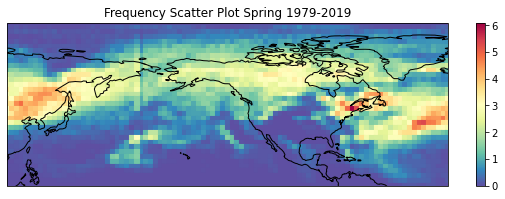

In [11]:
f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=frequency, marker='s', linewidths=0.1,cmap='Spectral_r')
plt.colorbar(b);
plt.savefig('/data/asoria/TRACK/500mb_composite/freq_scatter_plot.png',dpi=300)
plt.title('Frequency Scatter Plot Spring 1979-2019')

In [12]:
# 41 is years, 123 days in a szn, 10512 is lat and lon
np.shape(dfs)

(41, 123, 10512)

In [13]:
a_dfs=np.asarray(dfs)
np.shape(a_dfs)

(41, 123, 10512)

In [14]:
array_dfs=a_dfs[:,1:,:]
np.shape(array_dfs)

(41, 122, 10512)

In [15]:
reshape_dfs=array_dfs.reshape((5002,10512))
np.shape(reshape_dfs)

(5002, 10512)

In [16]:
d1=datetime.date(1979,1,1)
d2=datetime.date(2019,12,31)

In [17]:
index = pd.date_range(start=d1,end=d2,freq='D')
len(index)

14975

In [18]:
#create list of spring months from index
spring_months=[]
for i in range(len(index)):
    if index[i].month== 3 or index[i].month==4 or index[i].month==5 or index[i].month==6:
        spring_months.append(index[i])
#len(spring_months)
spring_months[0:10]

[Timestamp('1979-03-01 00:00:00', freq='D'),
 Timestamp('1979-03-02 00:00:00', freq='D'),
 Timestamp('1979-03-03 00:00:00', freq='D'),
 Timestamp('1979-03-04 00:00:00', freq='D'),
 Timestamp('1979-03-05 00:00:00', freq='D'),
 Timestamp('1979-03-06 00:00:00', freq='D'),
 Timestamp('1979-03-07 00:00:00', freq='D'),
 Timestamp('1979-03-08 00:00:00', freq='D'),
 Timestamp('1979-03-09 00:00:00', freq='D'),
 Timestamp('1979-03-10 00:00:00', freq='D')]

In [19]:
#spring months idx list to grab the indicies
spring_months_idx=[]
for i in range(len(index)):
    if index[i].month== 3 or index[i].month==4 or index[i].month==5 or index[i].month==6:
        spring_months_idx.append(i)

In [20]:
rmm = pd.read_csv('/data/asoria/rmm.csv')
#1/1/1979,12/31/2019
rmm_daily=rmm[1675:16650]
mon = [3,4,5,6]
rmm_daily_spring = rmm_daily[rmm_daily.month.isin(mon)]
rmm_daily_spring

,year,month,day,RMM1,RMM2,phase,amplitude,Missing,Value=,1.00E+36,or,999
1734,1979,3,1,0.682209,-0.567690,4,0.887515,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
1735,1979,3,2,0.714024,-0.447910,4,0.842882,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
1736,1979,3,3,0.997264,-0.490090,4,1.111180,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
1737,1979,3,4,0.861130,-0.523510,4,1.007770,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
1738,1979,3,5,0.782473,-0.593410,4,0.982038,Final_value:__OLR_&_NCEP_winds,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16461,2019,6,26,-0.390673,0.871034,7,0.954633,Prelim_value:_OLR_&_ACCESS_wind,NaN,NaN,NaN,NaN
16462,2019,6,27,-0.316013,1.079277,7,1.124590,Prelim_value:_OLR_&_ACCESS_wind,NaN,NaN,NaN,NaN
16463,2019,6,28,-0.386501,0.921247,7,0.999039,Prelim_value:_OLR_&_ACCESS_wind,NaN,NaN,NaN,NaN
16464,2019,6,29,-0.537597,0.766673,7,0.936375,Prelim_value:_OLR_&_ACCESS_wind,NaN,NaN,NaN,NaN


In [21]:
reshape_dfs=array_dfs.reshape((5002,10512))
np.shape(reshape_dfs)

(5002, 10512)

In [22]:
reshape_dfs2 = reshape_dfs.reshape((5002,73,144))
np.shape(reshape_dfs2)

(5002, 73, 144)

In [23]:
phase_spring=rmm_daily_spring['phase']
amp_spring=rmm_daily_spring['amplitude']

In [24]:
longitude_mesh

array([[  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       ...,
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5],
       [  0. ,   2.5,   5. , ..., 352.5, 355. , 357.5]], dtype=float32)

In [25]:
#create new hgt500 array
spring_counts = xr.Dataset({
    'dfs': xr.DataArray(
                data   = reshape_dfs2,
                dims   = ['phase_spring','latitude','longitude'],
                coords = {'phase_spring': phase_spring, 'latitude': latitude_mesh[:,0], 'longitude':longitude_mesh[0,:] }),
    'amplitude': xr.DataArray(
                data   = amp_spring,
                dims   = ['phase_spring'],
                coords = {'phase_spring': phase_spring})})
spring_counts

<xarray.Dataset>
Dimensions:       (latitude: 73, longitude: 144, phase_spring: 5002)
Coordinates:
  * phase_spring  (phase_spring) int64 4 4 4 4 4 4 4 4 4 5 ... 6 7 7 7 7 7 7 7 7
  * latitude      (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude     (longitude) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
Data variables:
    dfs           (phase_spring, latitude, longitude) float64 0.0 0.0 ... 0.0
    amplitude     (phase_spring) float64 0.8875 0.8429 1.111 ... 0.9364 0.9614

In [26]:
counts = spring_counts['dfs']
amp_var=spring_counts['amplitude']
phase_var=spring_counts['phase_spring']

In [27]:
strong_counts=counts[amp_var>=1]
strong_counts_mean=np.mean(strong_counts, axis=0)

In [28]:
strong_phase = phase_var[amp_var>=1]
len(strong_phase[strong_phase==8])

442

In [29]:
h=strong_counts.groupby(strong_phase).mean()
np.shape(h)


(8, 73, 144)

In [30]:
h_std = strong_counts.groupby(strong_phase).std()

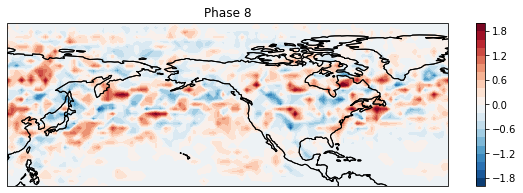

In [31]:
#t_score = (sample_mean-population_mean)/(sample_std/(np.sqrt(N-1)))

phase_num = 8
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

plt.show()
#plt.savefig('/data/asoria/TRACK/Final_figures/phase8.png',dpi=300)

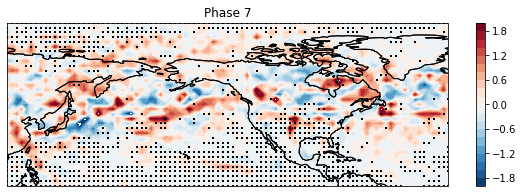

In [32]:
phase_num = 7

N = len(strong_phase[strong_phase==phase_num])
sample_mean = h[phase_num-1,:,:]
sample_std = h_std[phase_num-1,:,:]
population_mean = strong_counts_mean
t_score = (sample_mean-population_mean)/(sample_std/(np.sqrt(N-1)))
df = N-2
t_crit = stats.t.ppf(0.975,df)

myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
stat_lat = latitude_mesh.copy()
stat_lon = longitude_mesh.copy()

stat_lat[np.abs(t_score)<t_crit]=np.nan
stat_lon[np.abs(t_score)<t_crit]=np.nan

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)

plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))
plt.scatter(stat_lon,stat_lat, s=5, color='black',marker='+')
plt.show()

In [40]:
phase_num = 8

N = len(strong_phase[strong_phase==phase_num])
sample_mean = h[phase_num-1,:,:]
sample_std = h_std[phase_num-1,:,:]
population_mean = strong_counts_mean
t_score = (sample_mean-population_mean)/(sample_std/(np.sqrt(N-1)))
df = N-2
t_crit = stats.t.ppf(0.975,df)
#print(N)
#print(sample_mean)
#print(sample_std)
#print(population_mean)
print(np.shape(t_score))

(73, 144)


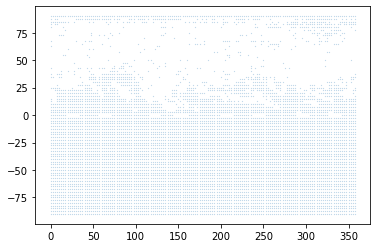

In [34]:
plt.scatter(stat_lon,stat_lat, s=0.01)

In [37]:
phase_num = 7

N = len(strong_phase[strong_phase==phase_num])
sample_mean = h[phase_num-1,:,:]
sample_std = h_std[phase_num-1,:,:]
population_mean = strong_counts_mean
t_score = (sample_mean-population_mean)/(sample_std/(np.sqrt(N-1)))
df = N-2
t_crit = stats.t.ppf(0.975,df)
print(t_score)

<xarray.DataArray 'dfs' (latitude: 73, longitude: 144)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [     -inf, 0.1664561,      -inf, ...,      -inf, 0.1664561,
             -inf],
       [     -inf,      -inf,      -inf, ...,      -inf,      -inf,
             -inf],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]])
Coordinates:
  * latitude      (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude     (longitude) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
    phase_spring  int64 7


In [41]:
np.shape(mylat)

(73, 144)

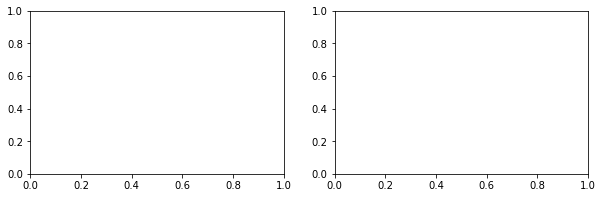

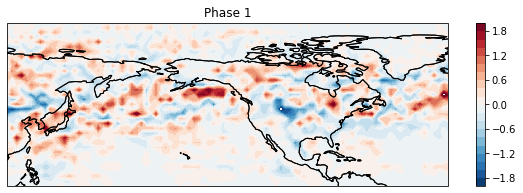

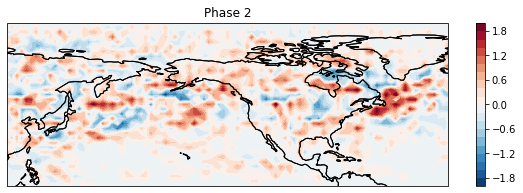

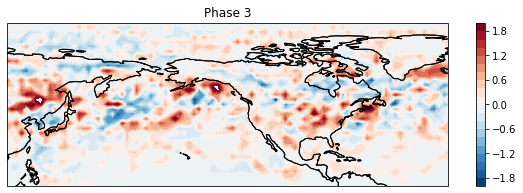

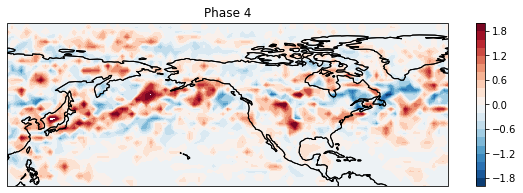

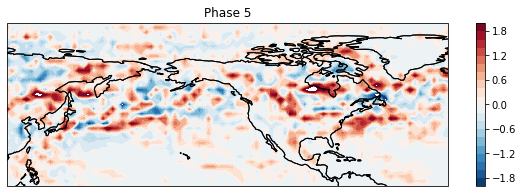

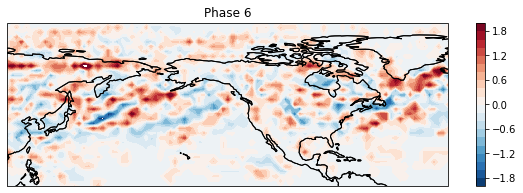

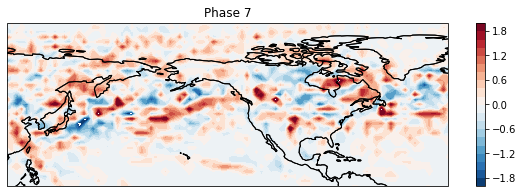

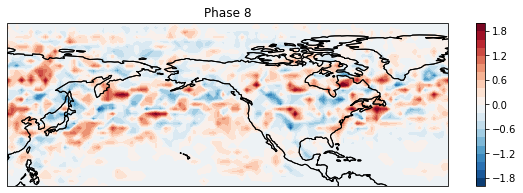

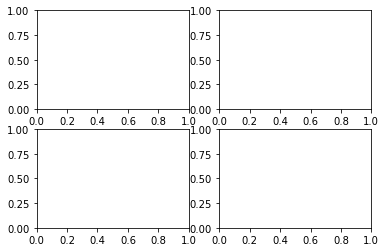

In [35]:
phase_num = 1
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

fig, (plot1,plot2)=plt.subplots(1,2, figsize=(10,3))

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

plt.show()

phase_num = 2
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot2=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

plt.show()

phase_num = 3
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

plt.show()

phase_num = 4
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

plt.show()

phase_num = 5
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

plt.show()

phase_num = 6
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

plt.show()

phase_num = 7
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

phase_num = 8
myvar = (h[phase_num-1,:,:]*100)-frequency_mesh_climo
mylat = latitude_mesh
mylon = longitude_mesh

f= plt.figure(figsize=(10,3))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 340, 5, 120], crs=ccrs.PlateCarree())

ax.coastlines(linewidth=1, color='k')
vmin=-2
vmax=2
n =20
levels = np.linspace(vmin, vmax,n+1)
plot1=plt.contourf(mylon, mylat, myvar, transform=ccrs.PlateCarree(),cmap='RdBu_r',levels=levels)
plt.colorbar(orientation='vertical', shrink = 1)
ax.coastlines()
ax.set_title('Phase '+ str(phase_num))

figure, axes = plt.subplots(nrows=2, ncols=2)
plt.show()